In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Mount drive for stored data access
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load data from 'complete_data.xlsx' data set found in drive
dataset_path ='/content/drive/My Drive/Difficult Words Data/DHH Children Data/'

data = pd.read_excel(dataset_path + 'complete_data.xlsx')

In [ ]:
#Display 15 random samples from the 'complete_data.xlsx' data set, ensure its the correct data
sampled_data = data.sample(n=15)
print(sampled_data)

          words  no_of_char  syllable_count  Frequency_of_occurrence   \
521    TASMANIA           1               1                         1   
737        FAIR           0               0                         0   
740        FEAR           0               0                         0   
660      CARVED           0               0                         0   
411  PUBLISHING           1               1                         1   
678  COMPRISING           1               1                         0   
626     approve           1               0                         0   
513      SUNDAY           0               0                         1   
859    PIERCING           1               0                         1   
136     CROPPER           1               0                         1   
811        LOVE           0               0                         0   
76         CALM           0               0                         1   
636      August           0               0        

In [ ]:
#Extract data features, dropping 'overall_label' and 'words'
X = data.drop(columns=['overall_label','words'])
#Extract target variable
y = data['overall_label']

#Split the data into training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Create MLP model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(7,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
#Compile MLP model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#Train MLP model, epochs can be increased or decreased, however 10 seems sufficient
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

#Evaluate how accurate the MLP model is
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {test_loss:.4f}')
print(f'Accuracy: {test_accuracy:.4f}')


Epoch 1/10
20/20 [==============================] - 1s 12ms/step - loss: 0.6084 - accuracy: 0.6922 - val_loss: 0.4923 - val_accuracy: 0.8875
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4444 - accuracy: 0.8656 - val_loss: 0.3507 - val_accuracy: 0.8938
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3176 - accuracy: 0.8703 - val_loss: 0.2684 - val_accuracy: 0.8938
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.2451 - accuracy: 0.8906 - val_loss: 0.2771 - val_accuracy: 0.9000
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2114 - accuracy: 0.9172 - val_loss: 0.2335 - val_accuracy: 0.9062
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1809 - accuracy: 0.9516 - val_loss: 0.2255 - val_accuracy: 0.9250
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1721 - accuracy: 0.9500 - val_loss: 0.2456 - val_accuracy: 0.9250
Epoch 8/10
20/20 [=

In [ ]:
#Import confusion matrix and roc libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

7/7 [==============================] - 0s 2ms/step


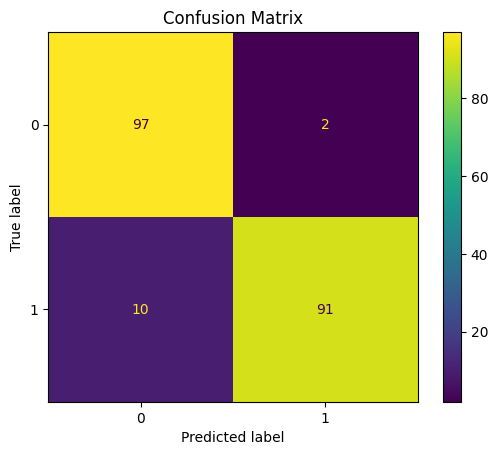

In [ ]:
#Predict probabilities on previously trained model
y_pred = model.predict(X_test)

#Ensure binary predictions, from 0 to 1
y_pred_binary = (y_pred > 0.5)

#Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1']).plot()
plt.title('Confusion Matrix')
plt.show()

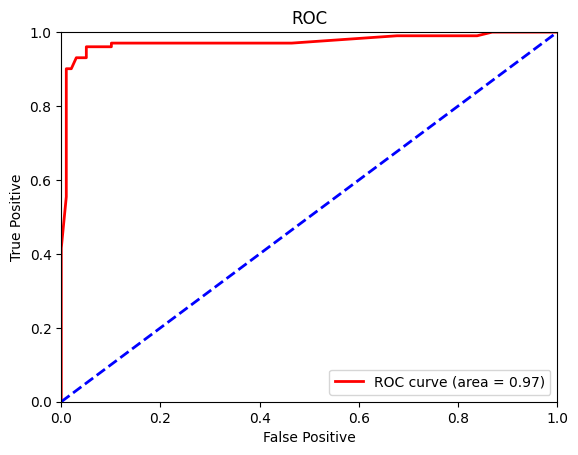

In [ ]:
#Compute the roc curve and auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

#Plot roc curve using false and true positives, color code each line
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='blue', lw=2, linestyle='--')

#Set x and y axis
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#Create labels for roc
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Exporting model
import joblib

# Save the model
joblib.dump(model, 'mpl_child_model.pkl')

['mpl_child_model.pkl']